In [2]:
# magic function para hacer que los graficos de matplotlib se renderizen en el notebook.
%matplotlib inline

import datetime as datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)

In [3]:
# carga de un data frame
#flights = pd.read_csv('../data/flight-delays/flights.csv', low_memory=False)
stations = pd.read_csv('./data/station.csv', low_memory=False)

In [4]:
stations[:10]

,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013
5,7,Paseo de San Antonio,37.333798,-121.886943,15,San Jose,8/7/2013
6,8,San Salvador at 1st,37.330165,-121.885831,15,San Jose,8/5/2013
7,9,Japantown,37.348742,-121.894715,15,San Jose,8/5/2013
8,10,San Jose City Hall,37.337391,-121.886995,15,San Jose,8/6/2013
9,11,MLK Library,37.335885,-121.885660,19,San Jose,8/6/2013


In [5]:
stations

,id,name,lat,long,dock_count,city,installation_date
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013
5,7,Paseo de San Antonio,37.333798,-121.886943,15,San Jose,8/7/2013
6,8,San Salvador at 1st,37.330165,-121.885831,15,San Jose,8/5/2013
7,9,Japantown,37.348742,-121.894715,15,San Jose,8/5/2013
8,10,San Jose City Hall,37.337391,-121.886995,15,San Jose,8/6/2013
9,11,MLK Library,37.335885,-121.885660,19,San Jose,8/6/2013


In [5]:
count_citys = stations['city'].value_counts()


<IPython.core.display.Javascript object>


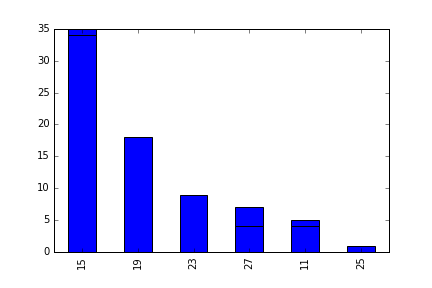

In [6]:
%matplotlib notebook
# top 20
count_citys[:10].plot('bar')

In [9]:
count_dock = stations['dock_count'].value_counts()
count_dock

15    34
19    18
23     9
27     4
11     4
25     1
Name: dock_count, dtype: int64

In [10]:
count_isntalation = stations['installation_date'].value_counts()
count_isntalation 

8/23/2013     7
8/19/2013     6
8/20/2013     6
8/25/2013     5
8/5/2013      5
8/15/2013     5
8/22/2013     5
8/21/2013     5
8/6/2013      5
8/14/2013     4
8/12/2013     4
8/7/2013      4
12/31/2013    3
8/16/2013     3
2/20/2014     1
4/9/2014      1
1/22/2014     1
Name: installation_date, dtype: int64